In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/intership/Iris (2).csv")

In [4]:
df.shape

(150, 6)

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<BarContainer object of 150 artists>

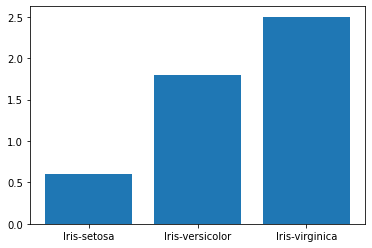

In [6]:
plt.bar(df['Species'],df['PetalWidthCm'])

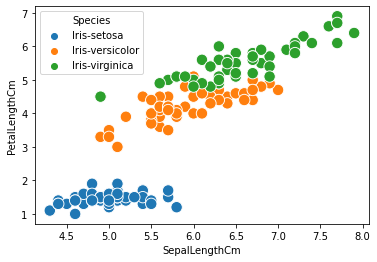

In [7]:
import seaborn as sns
sns.scatterplot(x=df["SepalLengthCm"],y=df["PetalLengthCm"], hue=df["Species"],s=130)

In [8]:
X= df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm" ]]

In [9]:
X=np.asarray(X)

In [10]:
X.dtype

dtype('float64')

In [11]:
Y=df["Species"]

In [12]:
Y=np.asarray(Y)

In [13]:
Y.dtype

dtype('O')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

abc=clf.fit(X_train,Y_train)

In [17]:
X_test[0:5]

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8]])

In [18]:
Y_test[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [19]:
Y_pred=abc.predict(X_test)

In [20]:
Y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [21]:
Y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [22]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') 

0.9775761242185925

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(Y_test, Y_pred,digits=2))
print("confusion marix")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(Y_test, Y_pred, average='weighted'))

classificationreport
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

confusion marix
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
jaccob index
0.9570370370370369


SVM

In [25]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print(classification_report(Y_test, Y_pred,digits=2))
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import jaccard_score
print(jaccard_score(Y_test, Y_pred, average='weighted'))


 Predicted Values:

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
0.9570370370370369


Decision Tree

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(Y_test, Y_pred,digits=2))
print("confusion marix")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(Y_test, Y_pred, average='weighted'))


 Predicted Values:

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
classificationreport
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

confusion marix
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
jaccob index
0.9570370370370369


Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(Y_test, Y_pred,digits=2))
print("confusion marix")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(Y_test, Y_pred, average='weighted'))


 Predicted Values:

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
classificationreport
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

confusion marix
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
jaccob index
0.9570370370370369
